# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [24]:
import pandas as pd

## imports for Python, Pandas and Matplotlib

In [38]:
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [26]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [27]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [28]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [29]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [30]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


# ****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [31]:
# Load the JSON data for world bank projects
json.load((open('data/world_bank_projects.json')))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [122]:
# Load data as a pandas dataframe
json_df = pd.read_json('data/world_bank_projects.json')

In [123]:
# Find the top 10 major project themes (using column 'mjtheme_namecode')

# Load data as a dictionary data type and normalize json (flatten)
json_df_str = json.load(open('data/world_bank_projects.json'))
result = json_normalize(json_df_str,'mjtheme_namecode')
# Group by project name and aggregate by count
result = result.groupby('name',as_index=False)['name'].agg({'count': 'count'}).sort_values('count', ascending=False).head(10)
# Rename column
result.rename(columns={'name': 'project_theme'})

,project_theme,count
2,Environment and natural resources management,223
7,Rural development,202
4,Human development,197
5,Public sector governance,184
9,Social protection and risk management,158
3,Financial and private sector development,130
0,,122
8,Social dev/gender/inclusion,119
10,Trade and integration,72
11,Urban development,47


In [181]:
#Find the 10 countries with most projects
top_projects = json_df.groupby('countryname')['countryname'].agg({'project_count': 'count'}).sort_values('project_count', ascending=False).head(10)
top_projects

/Users/tsed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,project_count
countryname,
People's Republic of China,19
Republic of Indonesia,19
Socialist Republic of Vietnam,17
Republic of India,16
Republic of Yemen,13
People's Republic of Bangladesh,12
Nepal,12
Kingdom of Morocco,12
Republic of Mozambique,11


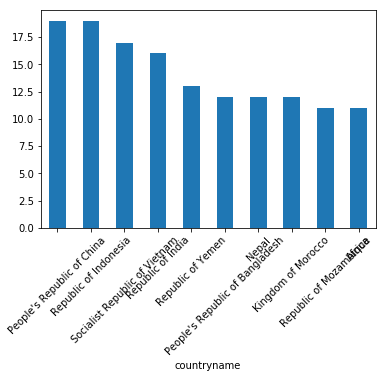

In [182]:
# Visualize the top 10 countries with the most projects
top_projects = top_projects['project_count']
df = pd.DataFrame([top_projects]).transpose()
df.plot(kind='bar', legend=False, rot=45)
plt.show()

In [121]:
#In 2. above you will notice that some entries have only the code and the name is missing. 
#Create a dataframe with the missing names filled in.

# Load data as a dictionary data type and normalize json (flatten)
json_df_str = json.load(open('data/world_bank_projects.json'))
result = json_normalize(json_df_str,'mjtheme_namecode')
# Replace missing names by first sorting then padding the missing values
result = result.sort_values('code')
result['name'] = result.name.replace('',method='pad')
# Group by project name and aggregate by count
result = result.groupby('name',as_index=False)['name'].agg({'count': 'count'}).sort_values('count', ascending=False).head(10)
# Rename column
result = result.rename(columns={'name': 'project_theme'})
result

,project_theme,count
1,Environment and natural resources management,250
6,Rural development,216
3,Human development,210
4,Public sector governance,199
8,Social protection and risk management,168
2,Financial and private sector development,146
7,Social dev/gender/inclusion,130
9,Trade and integration,77
10,Urban development,50
0,Economic management,38


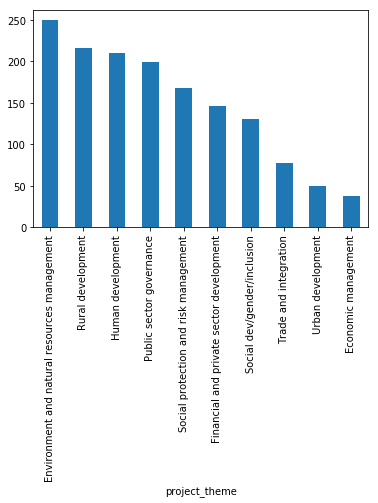

In [81]:
# Data Visualization of the top 10 project themes
result.plot(x='project_theme', y='count', kind='Bar', legend=False)
plt.show()